In [12]:
import numpy as nm 
import matplotlib.pyplot as mpt
import pandas as pd
import seaborn as sns

In [13]:
data_set = pd.read_csv('train.csv') 
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data_set.shape #no. of rows and columns

(891, 12)

In [15]:
#Finding out how much data is missing
data_set.info


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

<AxesSubplot:>

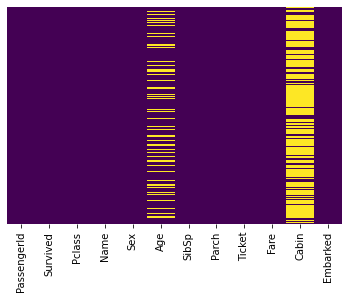

In [16]:
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='viridis') #Indicates the null values in input data

In [17]:
data_set.isnull().sum() #gives number of null values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling missing data

Since majority of data in Cabin is null valued, 
we will drop the column from our data set

In [18]:
data_set=data_set.drop(columns='Cabin',axis=1)  #deletes the column from the data

The Age column has only 177 null valued entries,
hence we replace them with the mean of the non-null entries

In [19]:
data_set['Age'].fillna(data_set['Age'].mean(),inplace=True)

The Embarked column has the port of Embarkation, which has three
values i.e.,(S, C and Q). We will replace the null values with
the port which occurs most number of times (mode of the data set)
in rest of the data, as we cannot calculate the mean for string values.

In [20]:
print(data_set['Embarked'].mode()[0])
data_set['Embarked'].fillna(data_set['Embarked'].mode()[0],inplace=True)

S


The Data plot after data preprocessing

<AxesSubplot:>

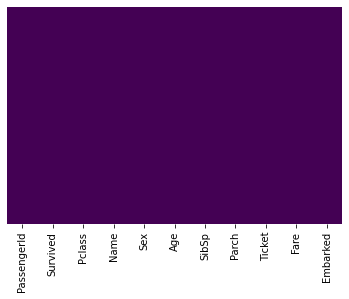

In [21]:
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')   